# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [3]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16CS' in k[:4]}
    
for (k,v) in data.items():
    print(k,v['cgpa'][1])
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16CS01044 9.60
16CS01038 6.45
16CS01036 4.65
16CS01037 6.91
16CS01034 7.81
16CS01035 6.28
16CS01032 7.40
16CS01033 5.79
16CS01030 6.32
16CS01031 7.91
16CS01003 8.40
16CS01002 8.40
16CS01001 7.91
16CS01007 9.40
16CS01006 8.00
16CS01005 8.66
16CS01004 8.66
16CS01009 6.25
16CS01008 7.28
16CS01014 9.55
16CS01015 8.40
16CS01016 7.60
16CS01017 9.70
16CS01010 9.13
16CS01011 8.00
16CS01012 8.36
16CS01013 8.43
16CS01018 8.26
16CS01019 8.40
16CS01024 8.09
16CS01040 6.38
16CS01045 9.47
16CS01043 9.60
16CS01042 9.66
16CS01041 9.72
16CS01029 9.34
16CS01028 8.43
16CS01025 8.11
16CS01027 6.98
16CS01026 7.34
16CS01021 6.70
16CS01020 6.68
16CS01023 7.21
16CS01022 5.13
Total Stuents: 44


## Date of Birth analysis

In [4]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:  October 11, 1998
  Median: December 27, 1998
  Oldest:    March 14, 1997
Youngest:     June 01, 2000


## Branch Change Analysis

In [9]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 40 and v['cgpa'][2] !='WH')]
cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass


Total branch changers: 5

CGPA (after 2nd sem) for branch change:-
Highest: 9.72
 Lowest: 9.47
Average: 9.61
 Median: 9.6
Standard Deviation: 0.08294576541331088 


## Course wise analysis

In [6]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,CS2S001,Project Seminar,2,44,0,0,0,0,0,0,0,44,0,0.00,0.0
1,ME1L001,Mechanics,4,44,4,4,6,11,10,8,0,0,1,7.00,7.0
2,ME2L501,Elements of Mechanical Engineering,3,1,0,0,0,1,0,0,0,0,0,7.00,7.0
3,HS2L002,Speaking and Presentation,4,22,0,3,3,10,2,1,1,2,0,7.15,7.0
4,EC2L001,Introduction to Electronics,4,44,5,4,8,10,10,3,4,0,0,7.16,7.0
5,CS2L001,Discrete Structures,4,44,1,7,9,14,7,6,0,0,0,7.16,7.0
6,CE2L011,Building materials and Construction,3,6,0,0,1,4,0,0,0,1,0,7.20,7.0
7,PH1L001,Physics,4,44,5,8,7,8,10,6,0,0,0,7.36,7.0
8,EC2L004,Digital Electronics Circuits,4,40,4,5,4,16,7,1,1,2,0,7.39,7.0
9,CS2P002,Data Structure Laboratory,2,44,6,7,8,6,12,5,0,0,0,7.41,7.0


## CGPA Analysis

Top 5 Students:

16CS01041  TUMMALA MADHAV  9.71
16CS01042  SAKSHAM ARNEJA  9.70
16CS01017  ADITYA PAL  9.70
16CS01014  ANKIT PRADHAN  9.55
16CS01007  YATAM VENU MADHAV  9.52

CGPA:
Highest: 9.71
lowest: 4.51
 Median: 7.87
Average: 7.72
Standard Deviation: 1.34 

   9.5+: 5
  9-9.5: 4
  8.5-9: 1
  8-8.5: 10
  7.5-8: 7
  7-7.5: 7
     7-: 10




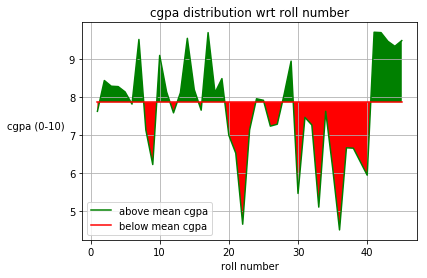

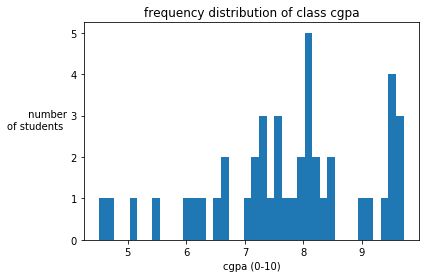

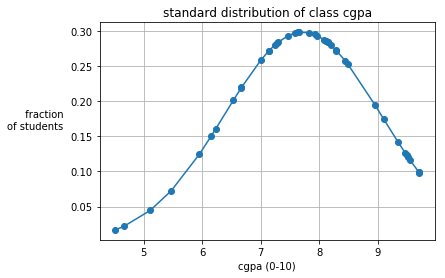

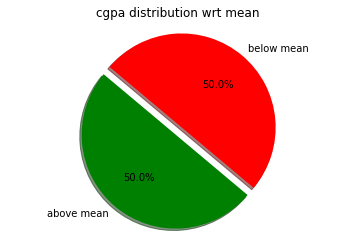

In [12]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

#for individual cgpa 

# print("Students with theri cgpa :\n")
# for element in roll_and_cgpa:
#     print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this plot shows that students from roll number between 1 to 19 shows a good aveage performance while those at the roll number between 30 to 40 have very low average. these students need to receive better support in coming semester to impove their performance.Also the class has very large deviation showing a one sided growth and lack of overall improvement.


https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation